In [42]:
# Import dependencies
import requests
import json
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

In [43]:
# Read files into DataFrame
path_conflict = Path("Resources/conflict_data.csv")
conflict_df = pd.read_csv(path_conflict)

path_migration = Path("Resources/net_migration.csv")
migration_df = pd.read_csv(path_migration)

path_population = Path("Resources/population(1).csv")
population_df = pd.read_csv(path_population)

In [44]:
# Preview Data Sets
conflict_df.head()
conflict_df.tail()

,Entity,Code,Year,One-sided violence,Non-state,Intrastate,Interstate
6965,Zimbabwe,ZWE,2018,0,0,0,0
6966,Zimbabwe,ZWE,2019,0,0,0,0
6967,Zimbabwe,ZWE,2020,0,0,0,0
6968,Zimbabwe,ZWE,2021,0,0,0,0
6969,Zimbabwe,ZWE,2022,0,0,0,0


In [45]:
migration_df.head()

,Country name,Year,Net migration
0,Afghanistan,1950,6161
1,Afghanistan,1951,4903
2,Afghanistan,1952,145
3,Afghanistan,1953,-8867
4,Afghanistan,1954,-6837


In [46]:
population_df.head()

,Country name,Year,Population,Population of children under the age of 1,Population of children under the age of 5,Population of children under the age of 15,Population under the age of 25,Population aged 15 to 64 years,Population older than 15 years,Population older than 18 years,...,population__all__50_54__records,population__all__55_59__records,population__all__60_64__records,population__all__65_69__records,population__all__70_74__records,population__all__75_79__records,population__all__80_84__records,population__all__85_89__records,population__all__90_94__records,population__all__95_99__records
0,Afghanistan,1950,7480464,301735,1248282,3068855,4494349,4198587,4411609,3946595,...,255563,211607,161196,110709,64310,28381,8153,1346,115,8
1,Afghanistan,1951,7571542,299368,1246857,3105444,4552138,4250002,4466098,3993640,...,256915,211966,161821,111465,65210,29148,8672,1483,109,9
2,Afghanistan,1952,7667534,305393,1248220,3145070,4613604,4303436,4522464,4041439,...,258952,211946,162710,112142,66123,29903,9137,1584,129,10
3,Afghanistan,1953,7764549,311574,1254725,3186382,4676232,4356242,4578167,4088379,...,261238,211731,163777,112800,67058,30647,9561,1693,155,11
4,Afghanistan,1954,7864289,317584,1267817,3231060,4741371,4408474,4633229,4136116,...,263301,211816,164736,113474,67953,31345,9963,1830,179,11


In [47]:
# Clean up Population Table to just country, year, and pop
selected_columns = population_df[["Country name", "Year", "Population"]]
population_only_df = pd.DataFrame(selected_columns)
population_only_df.head()

,Country name,Year,Population
0,Afghanistan,1950,7480464
1,Afghanistan,1951,7571542
2,Afghanistan,1952,7667534
3,Afghanistan,1953,7764549
4,Afghanistan,1954,7864289


In [48]:
# Check info on all the dfs
conflict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6970 entries, 0 to 6969
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Entity              6970 non-null   object
 1   Code                6970 non-null   object
 2   Year                6970 non-null   int64 
 3   One-sided violence  6970 non-null   int64 
 4   Non-state           6970 non-null   int64 
 5   Intrastate          6970 non-null   int64 
 6   Interstate          6970 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 381.3+ KB


In [49]:
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 40 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                18288 non-null  object 
 1   Year                                        18288 non-null  int64  
 2   Population                                  18288 non-null  int64  
 3   Population of children under the age of 1   18288 non-null  float64
 4   Population of children under the age of 5   18288 non-null  int64  
 5   Population of children under the age of 15  18288 non-null  int64  
 6   Population under the age of 25              18288 non-null  int64  
 7   Population aged 15 to 64 years              18288 non-null  int64  
 8   Population older than 15 years              18288 non-null  int64  
 9   Population older than 18 years              18288 non-null  int64  
 10  Population

In [50]:
migration_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18360 entries, 0 to 18359
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country name   18360 non-null  object 
 1   Year           18360 non-null  int64  
 2   Net migration  18360 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 430.4+ KB


In [51]:
conflict_df.head()

,Entity,Code,Year,One-sided violence,Non-state,Intrastate,Interstate
0,Abkhazia,OWID_ABK,1989,0,0,0,0
1,Abkhazia,OWID_ABK,1990,0,0,0,0
2,Abkhazia,OWID_ABK,1991,0,0,0,0
3,Abkhazia,OWID_ABK,1992,0,0,0,0
4,Abkhazia,OWID_ABK,1993,0,0,0,0


In [52]:
# Create a new column with total deaths.
conflict_df["total_conflict_deaths"] = conflict_df[["One-sided violence", "Non-state", "Intrastate", "Interstate"]].sum(axis=1)
conflict_df

,Entity,Code,Year,One-sided violence,Non-state,Intrastate,Interstate,total_conflict_deaths
0,Abkhazia,OWID_ABK,1989,0,0,0,0,0
1,Abkhazia,OWID_ABK,1990,0,0,0,0,0
2,Abkhazia,OWID_ABK,1991,0,0,0,0,0
3,Abkhazia,OWID_ABK,1992,0,0,0,0,0
4,Abkhazia,OWID_ABK,1993,0,0,0,0,0
...,...,...,...,...,...,...,...,...
6965,Zimbabwe,ZWE,2018,0,0,0,0,0
6966,Zimbabwe,ZWE,2019,0,0,0,0,0
6967,Zimbabwe,ZWE,2020,0,0,0,0,0
6968,Zimbabwe,ZWE,2021,0,0,0,0,0


In [53]:
# Remove all conflicts except total.
conflict_df.drop(["One-sided violence", "Non-state", "Intrastate", "Interstate"], axis=1, inplace=True)
conflict_df

,Entity,Code,Year,total_conflict_deaths
0,Abkhazia,OWID_ABK,1989,0
1,Abkhazia,OWID_ABK,1990,0
2,Abkhazia,OWID_ABK,1991,0
3,Abkhazia,OWID_ABK,1992,0
4,Abkhazia,OWID_ABK,1993,0
...,...,...,...,...
6965,Zimbabwe,ZWE,2018,0
6966,Zimbabwe,ZWE,2019,0
6967,Zimbabwe,ZWE,2020,0
6968,Zimbabwe,ZWE,2021,0


In [54]:
# Rename 'Entity' column in conflict_df to 'country name'
conflict_df.rename(columns={'Entity': 'Country name'}, inplace=True)
conflict_df.head()

,Country name,Code,Year,total_conflict_deaths
0,Abkhazia,OWID_ABK,1989,0
1,Abkhazia,OWID_ABK,1990,0
2,Abkhazia,OWID_ABK,1991,0
3,Abkhazia,OWID_ABK,1992,0
4,Abkhazia,OWID_ABK,1993,0


In [55]:
# Merge conflict_df and migration_df on 'country_name' and 'year'
merged_df = pd.merge(conflict_df, migration_df, on=['Country name', 'Year'], how='outer')
merged_df.head()

,Country name,Code,Year,total_conflict_deaths,Net migration
0,Abkhazia,OWID_ABK,1989,0,NaN
1,Abkhazia,OWID_ABK,1990,0,NaN
2,Abkhazia,OWID_ABK,1991,0,NaN
3,Abkhazia,OWID_ABK,1992,0,NaN
4,Abkhazia,OWID_ABK,1993,0,NaN


In [56]:
# Merge the resulting DataFrame with population_df on 'country_name' and 'year'
merged_df = pd.merge(merged_df, population_only_df, on=['Country name', 'Year'], how='outer')
merged_df.head()

,Country name,Code,Year,total_conflict_deaths,Net migration,Population
0,Abkhazia,OWID_ABK,1989,0,NaN,NaN
1,Abkhazia,OWID_ABK,1990,0,NaN,NaN
2,Abkhazia,OWID_ABK,1991,0,NaN,NaN
3,Abkhazia,OWID_ABK,1992,0,NaN,NaN
4,Abkhazia,OWID_ABK,1993,0,NaN,NaN


In [57]:
# Remove any NaNs from the dataset.
merged_df.dropna(how="any", inplace=True)
merged_df.head()

,Country name,Code,Year,total_conflict_deaths,Net migration,Population
73,Afghanistan,AFG,1989,5411,2683,10673172
74,Afghanistan,AFG,1990,1514,-666001,10694804
75,Afghanistan,AFG,1991,3553,39926,10745168
76,Afghanistan,AFG,1992,4366,1834556,12057436
77,Afghanistan,AFG,1993,4097,1171818,14003764


In [58]:
# Remove Code column
merged_df.drop(["Code"], axis=1, inplace=True)
merged_df.head()

,Country name,Year,total_conflict_deaths,Net migration,Population
73,Afghanistan,1989,5411,2683,10673172
74,Afghanistan,1990,1514,-666001,10694804
75,Afghanistan,1991,3553,39926,10745168
76,Afghanistan,1992,4366,1834556,12057436
77,Afghanistan,1993,4097,1171818,14003764


In [59]:
# Reset Index
merged_df.reset_index(drop=True, inplace=True)
merged_df.head()

,Country name,Year,total_conflict_deaths,Net migration,Population
0,Afghanistan,1989,5411,2683,10673172
1,Afghanistan,1990,1514,-666001,10694804
2,Afghanistan,1991,3553,39926,10745168
3,Afghanistan,1992,4366,1834556,12057436
4,Afghanistan,1993,4097,1171818,14003764


In [60]:
# Copy merged df for different analysis
merged_copy_df = merged_df.copy()

In [61]:
# Remove all countries except for one
country_name = "Syria"
syria_df = merged_df[merged_df['Country name'] == country_name]
syria_df.head()

,Country name,Year,total_conflict_deaths,Net migration,Population
5676,Syria,1989,1,-12471,12034101
5677,Syria,1990,0,-12182,12409003
5678,Syria,1991,0,-11960,12782284
5679,Syria,1992,0,-11272,13156408
5680,Syria,1993,0,-11553,13537067


In [62]:
# Reset Index
syria_df.reset_index(drop=True, inplace=True)
syria_df.head()

,Country name,Year,total_conflict_deaths,Net migration,Population
0,Syria,1989,1,-12471,12034101
1,Syria,1990,0,-12182,12409003
2,Syria,1991,0,-11960,12782284
3,Syria,1992,0,-11272,13156408
4,Syria,1993,0,-11553,13537067


In [63]:
syria_df

,Country name,Year,total_conflict_deaths,Net migration,Population
0,Syria,1989,1,-12471,12034101
1,Syria,1990,0,-12182,12409003
2,Syria,1991,0,-11960,12782284
3,Syria,1992,0,-11272,13156408
4,Syria,1993,0,-11553,13537067
5,Syria,1994,0,-18146,13922629
6,Syria,1995,0,-13569,14313451
7,Syria,1996,0,-16245,14708883
8,Syria,1997,0,-16907,15104000
9,Syria,1998,0,-17572,15500556


In [64]:
# Drop Country Name and rename df
syria_df.drop(["Country name"], axis=1, inplace=True)


C:\Users\William Frescas\AppData\Local\Temp\ipykernel_34676\676637774.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syria_df.drop(["Country name"], axis=1, inplace=True)


In [65]:
def millions(x, pos):
    return f"{x*1e-6:1.0f}M"

In [66]:
def thousand(x, pos):
    return f"{x*1e-3:1.0f}K"

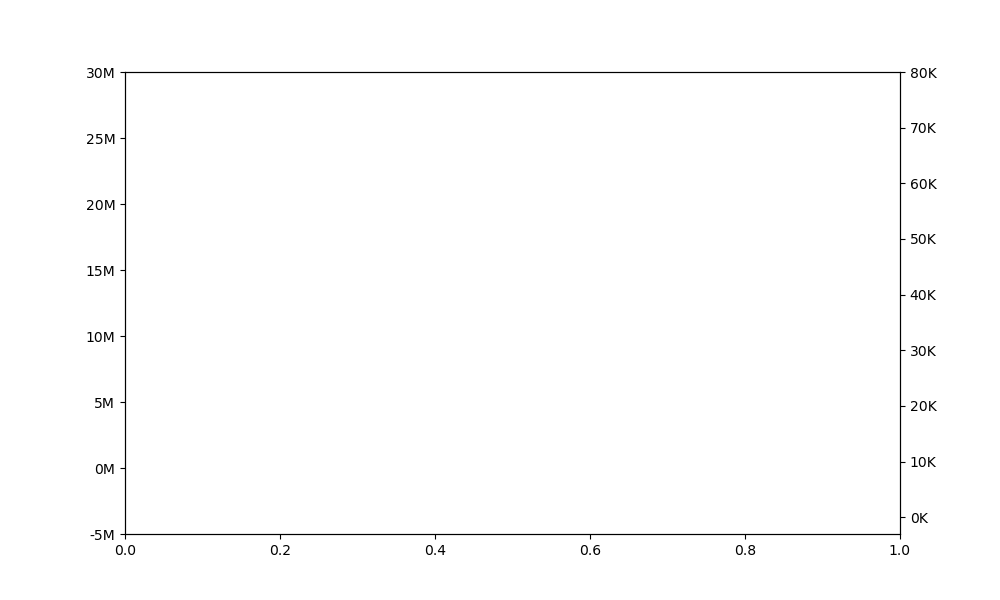

In [67]:
# Create graph for lines to go on
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()  
#ax1.set_ylim(-2, 1)
ax2.set_ylim(-3000, 80000)
ax1.set_ylim(-5000000, 30000000)

ax1.yaxis.set_major_formatter(millions)
ax2.yaxis.set_major_formatter(thousand)


In [68]:
# Plot Conclicts
ax2.plot(syria_df.Year, syria_df.total_conflict_deaths, label="Conflict Deaths", color="red")

In [69]:
# Plot Population
ax1.plot(syria_df.Year, syria_df.Population, label="Population")

In [70]:
# Plot Migration
ax1.plot(syria_df.Year, syria_df["Net migration"], label="Net migration")

In [71]:
# Clean up Graph
ax1.set_xlabel("Year")
ax1.set_ylabel('People')
plt.ylabel('People')
plt.title('Syria: Conflicts Affect on Pop & Migration')
ax2.grid(True)
#ax1.grid(True)
ax1.legend(loc="upper left")
ax2.legend(loc="best")

In [72]:
syria_df.corr()

,Year,total_conflict_deaths,Net migration,Population
Year,1,1,-0,1
total_conflict_deaths,1,1,-1,0
Net migration,-0,-1,1,-0
Population,1,0,-0,1


In [73]:
# Display data for headings
merged_df.head()

,Country name,Year,total_conflict_deaths,Net migration,Population
0,Afghanistan,1989,5411,2683,10673172
1,Afghanistan,1990,1514,-666001,10694804
2,Afghanistan,1991,3553,39926,10745168
3,Afghanistan,1992,4366,1834556,12057436
4,Afghanistan,1993,4097,1171818,14003764


In [74]:
# Create new column with ratio of migration to population
merged_df["percent_of_mig"] =  (abs(merged_df["Net migration"]) / merged_df.Population)
merged_df.head()

,Country name,Year,total_conflict_deaths,Net migration,Population,percent_of_mig
0,Afghanistan,1989,5411,2683,10673172,0
1,Afghanistan,1990,1514,-666001,10694804,0
2,Afghanistan,1991,3553,39926,10745168,0
3,Afghanistan,1992,4366,1834556,12057436,0
4,Afghanistan,1993,4097,1171818,14003764,0


In [75]:
# Create new column with ratio of conflict to population
merged_df["percent_of_conflicts"] =  merged_df.total_conflict_deaths / merged_df.Population
merged_df.head()

,Country name,Year,total_conflict_deaths,Net migration,Population,percent_of_mig,percent_of_conflicts
0,Afghanistan,1989,5411,2683,10673172,0,0
1,Afghanistan,1990,1514,-666001,10694804,0,0
2,Afghanistan,1991,3553,39926,10745168,0,0
3,Afghanistan,1992,4366,1834556,12057436,0,0
4,Afghanistan,1993,4097,1171818,14003764,0,0


In [76]:
# Function for doing an absolute value sum.
# Will be used for finding out which country has the most net migration, postive or negative.
def abs_sum(x):
    return abs(x).sum()

In [77]:
# Group by country, drop the year, and sum the rest of the columns.
country_totals_df = merged_df.groupby("Country name").agg({"total_conflict_deaths": "sum", "Net migration": abs_sum, "percent_of_mig": "mean", "percent_of_conflicts": "mean"}).reset_index()
pd.set_option('display.float_format', lambda x: '%.0f' % x)
country_totals_df.head()

,Country name,total_conflict_deaths,Net migration,percent_of_mig,percent_of_conflicts
0,Afghanistan,314432,11103009,0,0
1,Albania,22,1356525,0,0
2,Algeria,21115,1041999,0,0
3,Andorra,0,45590,0,0
4,Angola,33021,2005241,0,0


In [78]:
# Format columns to see the values.
country_totals_df.percent_of_mig = country_totals_df.percent_of_mig.map("{:.2f}".format)
country_totals_df.percent_of_conflicts = country_totals_df.percent_of_conflicts.map("{:.4f}".format)
country_totals_df.head()

,Country name,total_conflict_deaths,Net migration,percent_of_mig,percent_of_conflicts
0,Afghanistan,314432,11103009,0.02,0.0004
1,Albania,22,1356525,0.01,0.0000
2,Algeria,21115,1041999,0.00,0.0000
3,Andorra,0,45590,0.02,0.0000
4,Angola,33021,2005241,0.00,0.0001


In [79]:
# Sort with greatest percent of migration coming first
# Kuwait, Kuwait, United Arab Emirates, Marshall Islands, Liberia
country_totals_df.sort_values(by="percent_of_mig", ascending=False)

,Country name,total_conflict_deaths,Net migration,percent_of_mig,percent_of_conflicts
92,Kuwait,1816,4117949,0.06,0.0000
143,Qatar,0,2162775,0.05,0.0000
186,United Arab Emirates,0,5729719,0.04,0.0000
109,Marshall Islands,0,45874,0.03,0.0000
98,Liberia,23070,2211011,0.03,0.0003
...,...,...,...,...,...
107,Mali,9438,1391509,0.00,0.0000
38,Congo,15553,554539,0.00,0.0002
39,Costa Rica,0,278580,0.00,0.0000
104,Malawi,0,1698917,0.00,0.0000


In [80]:
# Sort with greatest percent of conflicts coming first
# Rwanda, Eritrea, Syria, Bosnia and Herzegovina, Afghanistan
country_totals_df.sort_values(by="percent_of_conflicts", ascending=False)

,Country name,total_conflict_deaths,Net migration,percent_of_mig,percent_of_conflicts
146,Rwanda,794897,5137299,0.02,0.0036
55,Eritrea,139709,1401127,0.02,0.0018
172,Syria,400842,9796808,0.01,0.0006
21,Bosnia and Herzegovina,65122,2154013,0.02,0.0005
0,Afghanistan,314432,11103009,0.02,0.0004
...,...,...,...,...,...
80,Iran,2184,9406065,0.00,0.0000
12,Bahrain,26,717734,0.02,0.0000
82,Ireland,1,832619,0.01,0.0000
83,Israel,1415,856416,0.00,0.0000


In [81]:
# Sort with greatest migration coming first
# United States, Pakistan, Bangladesh, China, Russia
country_totals_df.sort_values(by="Net migration", ascending=False)

,Country name,total_conflict_deaths,Net migration,percent_of_mig,percent_of_conflicts
188,United States,3031,43701953,0.00,0.0000
133,Pakistan,42892,25005660,0.00,0.0000
13,Bangladesh,976,13711631,0.00,0.0000
35,China,3102,13285302,0.00,0.0000
145,Russia,24550,11705525,0.00,0.0000
...,...,...,...,...,...
147,Saint Kitts and Nevis,0,6971,0.00,0.0000
134,Palau,0,6269,0.01,0.0000
100,Liechtenstein,0,6043,0.01,0.0000
122,Nauru,0,5048,0.01,0.0000


In [82]:
# Sort with greatest conflicts coming first
# Rwanda, Syria, Afghanistan, Eritrea, Iraq
country_totals_df.sort_values(by="total_conflict_deaths", ascending=False)

,Country name,total_conflict_deaths,Net migration,percent_of_mig,percent_of_conflicts
146,Rwanda,794897,5137299,0.02,0.0036
172,Syria,400842,9796808,0.01,0.0006
0,Afghanistan,314432,11103009,0.02,0.0004
55,Eritrea,139709,1401127,0.02,0.0018
81,Iraq,125802,6443666,0.01,0.0001
...,...,...,...,...,...
134,Palau,0,6269,0.01,0.0000
17,Belize,0,54670,0.01,0.0000
132,Oman,0,1988629,0.02,0.0000
131,Norway,0,682594,0.00,0.0000


In [83]:
merged_df

,Country name,Year,total_conflict_deaths,Net migration,Population,percent_of_mig,percent_of_conflicts
0,Afghanistan,1989,5411,2683,10673172,0,0
1,Afghanistan,1990,1514,-666001,10694804,0,0
2,Afghanistan,1991,3553,39926,10745168,0,0
3,Afghanistan,1992,4366,1834556,12057436,0,0
4,Afghanistan,1993,4097,1171818,14003764,0,0
...,...,...,...,...,...,...,...
6529,Zimbabwe,2017,0,-59918,14751101,0,0
6530,Zimbabwe,2018,0,-59918,15052191,0,0
6531,Zimbabwe,2019,0,-59918,15354606,0,0
6532,Zimbabwe,2020,0,-29955,15669663,0,0


In [84]:
# Create new column with ratio of conflict to population
# merged_df["population_pct_change"] =  merged_df.Population.pct_change

In [86]:
# merged_df.population_pct_change

0       <bound method NDFrame.pct_change of 0      106...
1       <bound method NDFrame.pct_change of 0      106...
2       <bound method NDFrame.pct_change of 0      106...
3       <bound method NDFrame.pct_change of 0      106...
4       <bound method NDFrame.pct_change of 0      106...
                              ...                        
6529    <bound method NDFrame.pct_change of 0      106...
6530    <bound method NDFrame.pct_change of 0      106...
6531    <bound method NDFrame.pct_change of 0      106...
6532    <bound method NDFrame.pct_change of 0      106...
6533    <bound method NDFrame.pct_change of 0      106...
Name: population_pct_change, Length: 6534, dtype: object